# Lending Club Part 2 - Decision Trees

## Python Libraries 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Load general utilities
# ----------------------
import pandas as pd
import datetime
import numpy as np
import pickle
import time

In [3]:
# Load sklearn utilities
# ----------------------
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, brier_score_loss, mean_squared_error, r2_score
from sklearn.calibration import calibration_curve

# Load classifiers
# ----------------
from sklearn.tree import DecisionTreeClassifier

In [4]:
# Other Packages
# --------------
from scipy.stats import kendalltau

import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

### Local Packages
Make sure you have downloaded the files:
>1. helpers_03_19.py
>2. helpers_05_08.py

and placed them in the same difrectory as the notebook

In [5]:
# Local Packages
# --------------
from helpers_05_08 import visualize_tree
from helpers_03_19 import prepare_data

## Load the data 

Read the data and features from the pickle

                   data - Pandas DataFrame with the data ingested
                           in the previous 
      discrete_features - list of discrete features: 
                           'term','grade',etc.
continuous_features - list of continuous features:
                           'loan_amnt','funded_amnt','installment',etc.


In [6]:
data,discrete_features,continuous_features,ret_cols=\
    pickle.load(open("./data/pickle/clean_data.pickle","rb"))

## Engineer features

Create a feature for the length of a person's credit history at the
time the loan is issued and add feature to list of continuous features

In [7]:
data['cr_hist']=(data.issue_d-data.earliest_cr_line)/np.timedelta64(1,'M')
continuous_features.append('cr_hist')

Create a target feature on whether loan ended in default

In [8]:
data["outcome"] = data.loan_status.isin(["Charged Off", "Default"])

### Partition  Data into training and testing

Generate a random vector of Boolean values based in which rows are assigned to either train or test

In [9]:
default_seed = 1
np.random.seed(default_seed)
data['train']=np.random.choice([True, False],size=len(data),p=[0.7, 0.3])
train = data.train.values

Convert pandas sub dataframe of continuous features to a numpy matrix

In [10]:
X_continuous=data[continuous_features].values

Use pandas built in functionality to replace discrete variables with k values with k discrete dummy (0/1) variables, keep a record of dummy variables created in this way and convert the resulting pandas sub dataframe of dummy variables into a numpy matrix

In [11]:
df_discrete=pd.get_dummies(data[discrete_features],\
                            dummy_na = True, prefix_sep = "::",\
                            drop_first = False)
discrete_features_dummies = df_discrete.columns.tolist()
X_discrete=df_discrete.values

Pull together the discrete and continuous values into one 
matrix and create another matrix with the target values 

In [12]:
X=np.concatenate( (X_continuous, X_discrete), axis = 1 )
y=data.outcome.values

### Problem 1
Write a script that verifies that the dummy variable conversion is correct.
1. write a script that lists all the dummy variables related to a discrete variable
    e.g. ['grade::A','grade::B',...] 
2. verify variables in list have values o or 1
3. verify variables in list add up to one

In [41]:
###############################
###   Write your code  here  ##
###############################



###############################

## Prepare functions to fit and evaluate models

'final_features' is the list of features that are used, we could chose to exclude certain features to prevent leakage or exclude features that are already dependent on models (such as grade)

In [13]:
exclusion=[]
final_features=[i for i in discrete_features + continuous_features\
                  if i not in exclusion]

In [14]:
data_dict =prepare_data(X,y,\
            data_subset = np.array([True]*len(data)),\
            n_samples_train=30000,n_samples_test=20000,\
            feature_subset=final_features,
            continuous_features=continuous_features,
            discrete_features_dummies=discrete_features_dummies,
            data=data,
            date_range_train=(data.issue_d.min(),data.issue_d.max()),
            date_range_test=(data.issue_d.min(),data.issue_d.max()),
            random_state=default_seed)

In [15]:
all_features = pd.Series(continuous_features + discrete_features_dummies)
idx = [i for i,j in enumerate(continuous_features + discrete_features_dummies)
                                                     if j.split("::")[0] in final_features]
selected_features = all_features[idx]
selected_features.reset_index(drop=True,inplace=True)

In [16]:
random_state=default_seed
np.random.seed(random_state)
X_train=data_dict['X_train']
y_train=data_dict['y_train']   
X_test=data_dict['X_test']
y_test=data_dict['y_test']
filter_train=data_dict['train_set']    

# Information Gain

## Problem 2

##### Write the code for a method:<br>

   >**<font color=blue>findInformationGain</font>(<font color=brown> selected_feature,threshold,y_train,X_train</font>)**<br>

 where X and y are matrices and vectors as above, _feature_ is a string and   _threshold_ is a float

e.g.:
> <font color=blue>findInformationGain</font>
(<font color=brown>'fico_range_high',710,y_train,X_train</font>)=0.010126<br>
> <font color=blue>findInformationGain</font>(<font color=brown>'term:: 60 months',0.5,y_train,X_train</font>)=0.008358<br>
> <font color=blue>findInformationGain</font>(<font color=brown>'term:: 36 months',0.5,y_train,X_train</font>)=0.008358<br>
> <font color=blue>findInformationGain</font>(<font color=brown>'grade::E',0.495,y_train,X_train</font>)=0.007554<br>



In [212]:
###############################
###   Write your code  here  ##
###############################



###############################

## Problem 3

For at least one continuous feature, chart the information gain vs threshold par chart below

<img src="InfoGain.png" alt="Alt text that describes the graphic" title="Title text" />


In [ ]:
###############################
###   Write your code  here  ##
###############################



###############################

## Problem 4
##### Write the code for a method:<br>

   >**<font color=blue>maxInformationGain</font>(<font color=brown> selected_feature,y_train,X_train</font>)**<br>


The method finds the range of values the feature takes, computes the information gain for one hundred data points/thresholds evenly dispersed within this range and finds the closest to optimal threshold


In [ ]:
###############################
###   Write your code  here  ##
###############################



###############################

Use the following script to create a table of the information gain of each feature and sort the list by information gain

In [18]:
feature_lst=[]
for select_feature in selected_features:
    gg=maxInformationGain(select_feature,y_train,X_train)
    feature_lst.append({'feature':select_feature,
                       'threshold':np.mean(gg[gg==np.max(gg)].index),
                       'information_gain':np.max(gg)})
df=pd.DataFrame(feature_lst,columns=['feature','threshold','information_gain'])
df.sort_values(by='information_gain',ascending=False).head(8)


,feature,threshold,information_gain
11,int_rate,12.750,0.025886
17,grade::A,0.495,0.017066
10,fico_range_low,708.100,0.010126
9,fico_range_high,711.430,0.010126
15,term:: 60 months,0.495,0.008358
14,term:: 36 months,0.495,0.008358
21,grade::E,0.495,0.007554
4,dti,24.400,0.006710


# Decision Tree

As discussed in class, the decision tree object is **instantiated** by a call to 'number_of_leaf_nodes'. Upon instantiation we provide some of the parameters, most important of which is the number of nodes.

In [20]:
number_of_leaf_nodes=5
decision_tree=DecisionTreeClassifier(max_leaf_nodes=number_of_leaf_nodes,\
                                     criterion='entropy')


After instantiation, we would like to **'fit'** the model, namely compute the coefficients of the underlying model. The time measurements is for our own track of execution time and will not be used subsequently. 

In [21]:
start_time=time.time()
decision_tree=decision_tree.fit(X_train, y_train)
end_time=time.time()
print("Fit time: "+str(round(end_time-start_time,2))+" seconds")

Fit time: 0.11 seconds


### Tree representation
The script below prints the raw unstructured representation of a decision tree in the model, aka the tree coefficients 

In [22]:
def rawPrint(decision_tree):
    n_nodes=decision_tree.tree_.node_count
    children_left=decision_tree.tree_.children_left
    children_right=decision_tree.tree_.children_right
    feature=decision_tree.tree_.feature
    threshold=decision_tree.tree_.threshold

    print('children_left:\t',children_left)
    print('children_right:\t',children_right)
    print('feature #:\t',feature)
    print('threshold:\t',[float((str(n).split('.'))[0]+'.'\
                 +(str(n).split('.'))[1][:2])\
           for n in list(threshold)]) 
    print('features used in the tree:')
    for i in feature:
        if i>0:
            print('\t',i,selected_features[i])
    return

rawPrint(decision_tree)

children_left:	 [ 1  3  5 -1 -1  7 -1 -1 -1]
children_right:	 [ 2  4  6 -1 -1  8 -1 -1 -1]
feature #:	 [11 17 11 -2 -2 30 -2 -2 -2]
threshold:	 [12.83, 0.5, 18.36, -2.0, -2.0, 0.5, -2.0, -2.0, -2.0]
features used in the tree:
	 11 int_rate
	 17 grade::A
	 11 int_rate
	 30 home_ownership::MORTGAGE


### Problem 2:

Write a method that prints a structured representation of the decision tree in memory as below (you can ignore color and apply tabs) 

The binary tree structure has 9 nodes with the following structure:<br>
<font color=red>node=0</font> test: if <font color=blue>int_rate</font><=12.84 goto node 1 else to node 2<br>
> <font color=red>node=1</font> test: if <font color=blue>grade::A</font><=0.50 goto node 3 else to node 4<br>
> <font color=red>node=2</font> test: if <font color=blue>int_rate</font><=18.37 goto node 5 else to node 6<br>
>>	<font color=red>node=3</font> leaf<br>
>>	<font color=red>node=4</font> leaf<br>
>>	<font color=red>node=5</font> test: if <font color=blue>home_ownership::MORTGAGE</font><=0.50 goto node 7 else to node 8<br>
>>	<font color=red>node=6</font> leaf<br>
>>>	<font color=red>node=7</font> leaf<br>
>>>	<font color=red>node=8</font> leaf<br>



In [ ]:
###############################
###   Write your code  here  ##
###############################



###############################

### Short  trees
The first decision node should be the feature and threshold with highest information gain we found earlier, depending on the features that where included in *selected_features*

In [23]:
number_of_leaf_nodes=2
decision_tree=DecisionTreeClassifier(max_leaf_nodes=number_of_leaf_nodes,\
                                     criterion='entropy')
decision_tree=decision_tree.fit(X_train, y_train)
rawPrint(decision_tree)

children_left:	 [ 1 -1 -1]
children_right:	 [ 2 -1 -1]
feature #:	 [11 -2 -2]
threshold:	 [12.83, -2.0, -2.0]
features used in the tree:
	 11 int_rate


Apply the exclusions bellow to the set of instruments and compare gain maximizing feature as computed above and features used in first decision of a short tree

> exclusion0=["grade","int_rate","installment"]<br>
> exclusion1=["int_rate", "installment"]<br>
> exclusion2=['loan_amnt','funded_amnt','installment','annual_inc']<br>
> exclusion3=['funded_amnt','annual_inc']<br>
> exclusion4=['grade','annual_inc']<br>

                information Gain      short tree                
exclusion0<br>
exclusion1<br>
exclusion2<br>
exclusion3<br>
exclusion4<br>

Text(0.5,1,'# leaf nodes = 2')

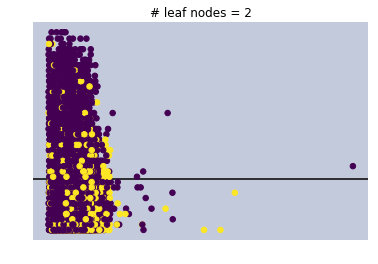

In [24]:
fig,axi = plt.subplots()
decision_tree=DecisionTreeClassifier(max_leaf_nodes=\
                                     number_of_leaf_nodes,\
                                     criterion='entropy')
visualize_tree(decision_tree, X_train.T[[4,9]].T, y_train, ax=axi)
axi.set_title('# leaf nodes = {0}'.format(number_of_leaf_nodes))